# Music Recommendation System using Spotify API

![](https://www.protocol.com/media-library/spotify-app-with-headphones-on.png?id=29171621&width=1000&height=750&quality=85&coordinates=0%2C0%2C0%2C0)

## Recommendation systems
**Recommendation systems** are algorithms and techniques designed to provide personalized suggestions or recommendations to users. These systems analyze user data and item attributes to generate relevant and tailored recommendations. Recommendation systems are widely used in various applications such as e-commerce (product recommendations), streaming services (movie/music recommendations), news websites (article recommendations), and more to enhance user experiences and drive engagement. 

In this notebook, I will be demonstrating one such application of Recommendation systems by building a Music Recommendation System using the Spotify API. The music recommendation system will assist users in discovering new and relevant musical content based on their preferences and listening behaviour.

### Table of Contents
1. Introduction
2. Spotify API

## Spotify API
**Spotify API** (Application Programming Interface) is a set of web services and tools provided by Spotify that allows developers to interact with the Spotify platform and access various music-related data and functionalities. Developers can use the Spotify API to integrate Spotify's vast music catalog, user playlists, and user-related data into their own applications, websites, or services.

I will be using the Spotify API for requesting and collecting real-time music data from Spotify. For accessing the API you first have to sign up for a developer account on Spotify. As I have already done this I am skipping this step. For more information you can check out the [Spotify API documentation](https://developer.spotify.com/documentation/web-api).

## Initial setup

To get started with building a Music Recommendation System, we first need to have an access token. The access token serves as a temporary authorization credential, allowing the code to make authenticated requests to the Spotify API on behalf of the application. The access token can be requested in the following way

In [157]:
# Importing required libraries
import requests
import base64
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

sns.set(style="darkgrid", palette="muted")
plt.style.use("ggplot")

In [141]:
# Replace with your Client ID and Client Secret
CLIENT_ID = 'ce4535f3e2b5472c81dadc11207e3d12'
CLIENT_SECRET = '5799dc1957a147f485fe2940b28c7414'

# Encode the client ID and client secret to base64
client_creds = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_creds_enc = base64.b64encode(client_creds.encode())

# Request the access token
TOKEN_URL = "https://accounts.spotify.com/api/token"
headers = {
    'Authorization': f'Basic {client_creds_enc.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(TOKEN_URL, data=data, headers=headers)

# Check if access token was obtained or not
if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


With the access token obtained, we can now make authorized requests to Spotify and retrieve music data, such as tracks, albums, artists, and user information, which is fundamental for our Music Recommendation System. Now to collect music data from Spotify we need to first install the [Spotipy](https://spotipy.readthedocs.io/en/2.22.1/) library, a Python library that provides access to Spotify’s web API

In [4]:
# Install the spotipy library
# !pip install spotipy

In [142]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Set up Spotipy with the access token
sp = spotipy.Spotify(auth=access_token)

## Data retrieval

After setting up the access token we can access the data easily. Let's find out information about an artist. 

### Artist info

In [4]:
# Get info about an artist
def get_artist_info(artist_id):
    artist = sp.artist(artist_id=artist_id)

    num_followers = artist['followers']['total']
    genres = artist['genres']
    artist_id = artist['id']
    name = artist['name']
    popularity_score = artist['popularity']
    img_url = artist['images'][2]['url']

    print(name)
    display(Image(url=img_url))
    print("Total followers:", num_followers)
    print("Popularity:", popularity_score)
    print("Genres:", *genres)

In [5]:
artist_id = "06HL4z0CvFAxyc27GXpf02"
get_artist_info(artist_id=artist_id)

Taylor Swift


Total followers: 86026925
Popularity: 100
Genres: pop


The above function extracts the artist information such as name, followers, popularity, etc. given the artist id. We got data for Taylor Swift above but this can be used to find info on any artist of choice.

### Artist albums

In [6]:
# Get info on artist's albums
def get_artist_albums(artist_id):
    artist_name = sp.artist(artist_id=artist_id)['name']
    artist_album = sp.artist_albums(artist_id=artist_id, album_type=['album', 'single'], limit=50)
    total_albums = artist_album['total']

    albums = []
    for i in range(total_albums):
        album = artist_album['items'][i]
        album_id = album['id']
        album_name = album['name']
        release_date = album['release_date']
        total_tracks = album['total_tracks']

        album_info = {'album_id': album_id,
                      'name': album_name,
                      'released': release_date,
                      'total_tracks': total_tracks}
        albums.append(album_info)
    
    print(f"Albums from {artist_name}")
    albums_df = pd.DataFrame(albums)
    return albums_df

The above function extracts information on an artist's albums given the artist id. You can see it in action below.

In [7]:
# Get albums from Taylor Swift
get_artist_albums(artist_id=artist_id)

Albums from Taylor Swift


,album_id,name,released,total_tracks
0,5AEDGbliTTfjOB8TSm1sxt,Speak Now (Taylor's Version),2023-07-07,22
1,1fnJ7k0bllNfL1kVdNVW1A,Midnights (The Til Dawn Edition),2023-05-26,23
2,3lS1y25WAhcqJDATJK70Mq,Midnights (3am Edition),2022-10-22,20
3,151w1FgRZfnKZA9FEcg9Z3,Midnights,2022-10-21,13
4,6kZ42qRrzov54LcAk4onW9,Red (Taylor's Version),2021-11-12,30
5,4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26
6,6AORtDjduMM3bupSWzbTSG,evermore (deluxe version),2021-01-07,17
7,2Xoteh7uEpea4TohMxjtaq,evermore,2020-12-11,15
8,0PZ7lAru5FDFHuirTkWe9Z,folklore: the long pond studio sessions (from ...,2020-11-25,34
9,1pzvBxYgT6OVwJLtHkrdQK,folklore (deluxe version),2020-08-18,17


### Top tracks
We can also extract the top 10 tracks from an artist given the artist id.

In [8]:
# Get artist's top 10 tracks
def get_artist_tracks(artist_id):
    artist_name = sp.artist(artist_id=artist_id)['name']
    artist_top_tracks = sp.artist_top_tracks(artist_id=artist_id)
    
    top_tracks = []
    for i in range(10):
        track = artist_top_tracks['tracks'][i]
        duration = track['duration_ms']
        track_id = track['id']
        track_name = track['name']
        popularity = track['popularity']
        album = track['album']['name']

        track_info = {'track_id': track_id,
                      'name': track_name,
                      'duration(ms)': duration,
                      'album': album,
                      'popularity_score': popularity}
        top_tracks.append(track_info)

    print(f"Top 10 tracks from {artist_name}")
    tracks_df = pd.DataFrame(top_tracks)
    return tracks_df

In [9]:
# Extract Taylor Swift's top 10 tracks
get_artist_tracks(artist_id=artist_id)

Top 10 tracks from Taylor Swift


,track_id,name,duration(ms),album,popularity_score
0,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,178426,Lover,100
1,0V3wPSX9ygBnCm8psDIegu,Anti-Hero,200690,Midnights,93
2,1p80LdxRV74UKvL8gnD7ky,Blank Space,231826,1989,83
3,4lIxdJw6W3Fg4vUIYCB0S5,Style,231000,1989,83
4,3hUxzQpSfdDqwM3ZTFQY0K,august,261922,folklore,93
5,4R2kfaDFhslZEMJqAFNpdd,cardigan,239560,folklore,91
6,7KokYm8cMIXCsGVmUvKtqf,Karma,204852,Midnights,90
7,1dGr1c8CrMLDpV6mPbImSI,Lover,221306,Lover,91
8,1R0a2iXumgCiFb7HEZ7gUE,Don’t Blame Me,236413,reputation,91
9,5kHMfzgLZP95O9NBy0ku4v,I Can See You (Taylor’s Version) (From The Vault),273186,Speak Now (Taylor's Version),90


**TODO**: make popularity score chart for tracks

### Track info
Let's now retrieve metadata inforamtion from the track such as its name, id, artists, duration, etc.

In [72]:
# Get track info from track_id
def get_track_info(track_id):
    track = sp.track(track_id=track_id)
    album_id = track['album']['id']
    album_name = track['album']['name']
    album_rel_date = track['album']['release_date']
    artists = ', '.join([artist['name'] for artist in track['artists']])
    duration = track['duration_ms']
    is_explicit = track['explicit']
    track_id = track['id']
    track_name = track['name']
    popularity = track['popularity']
    
    track_info = {'Track Name': track_name,
                  'Track ID': track_id,
                  'Artists': artists,
                  'Album Name': album_name,
                  'Album ID': album_id,
                  'Release Date': album_rel_date,
                  'Duration(ms)': duration,
                  'Popularity': popularity,
                  'Explicit': is_explicit}
    
    return track_info

In [74]:
# Retrieve inforamtion about a particular song/track
get_track_info(track_id="55n9yjI6qqXh5F2mYvUc2y")

{'Track Name': 'I Don’t Wanna Live Forever (Fifty Shades Darker)',
 'Track ID': '55n9yjI6qqXh5F2mYvUc2y',
 'Artists': ['ZAYN', 'Taylor Swift'],
 'Album Name': 'reputation Stadium Tour Surprise Song Playlist',
 'Album ID': '1MPAXuTVL2Ej5x0JHiSPq8',
 'Release Date': '2017-11-09',
 'Duration(ms)': 247160,
 'Popularity': 83,
 'Explicit': False}

### Audio features

We can also extract audio features like danceability, loudness, tempo, etc. from a track. Descriptions of each of these are given below taken from the official [documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features).

- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [115]:
# Get audio features from a track
def get_audio_features(track_id):
    audio_features = sp.audio_features(track_id)[0]
    
    keys_to_extract = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    audio_features_dict = {key: audio_features[key] for key in keys_to_extract}
    
    return audio_features_dict

In [116]:
track_id = "23L5CiUhw2jV1OIMwthR3S"
get_audio_features(track_id)

{'danceability': 0.501,
 'energy': 0.519,
 'key': 4,
 'loudness': -5.88,
 'mode': 0,
 'speechiness': 0.0409,
 'acousticness': 0.109,
 'instrumentalness': 0,
 'liveness': 0.454,
 'valence': 0.168,
 'tempo': 133.99}

This tells us that the track above is moderately danceable and energetic while the tone of the song seems to be on the sad side because of low valence.

We can combine the track info and audio features into a single dictionary for easy retrieval. 

In [119]:
def get_track_features(track_id):
    meta_features = get_track_info(track_id)
    audio_features = get_audio_features(track_id)
    all_features = {**meta_features, **audio_features}
    return all_features

In [121]:
get_track_features(track_id="0tgVpDi06FyKpA1z0VMD4v")

{'Track Name': 'Perfect',
 'Track ID': '0tgVpDi06FyKpA1z0VMD4v',
 'Artists': ['Ed Sheeran'],
 'Album Name': '÷ (Deluxe)',
 'Album ID': '3T4tUhGYeRNVUGevb0wThu',
 'Release Date': '2017-03-03',
 'Duration(ms)': 263400,
 'Popularity': 90,
 'Explicit': False,
 'danceability': 0.599,
 'energy': 0.448,
 'key': 8,
 'loudness': -6.312,
 'mode': 1,
 'speechiness': 0.0232,
 'acousticness': 0.163,
 'instrumentalness': 0,
 'liveness': 0.106,
 'valence': 0.168,
 'tempo': 95.05}

### Playlists analysis

To get data on more songs and albums we can analyze some playlists. Spotify playlists contain a treasure trove of information on various tracks available on Spotify. Now let's start analyzing playlists and combine all of the above information to get more features for the recommendation system to train on.

In [138]:
def get_playlist(playlist_id):
    playlist = sp.playlist_items(playlist_id)
    tracks_list = []
    for track in playlist['items']:
        track_id = track['track']['id']
        track_info = get_track_features(track_id)
        tracks_list.append(track_info)
    
    playlist_df = pd.DataFrame(tracks_list)
    return playlist_df

In [143]:
%%time 
playlist_id="37i9dQZF1DX76Wlfdnj7AP"
music_df = get_playlist(playlist_id)
music_df

CPU times: total: 31.2 ms
Wall time: 37.3 s


,Track Name,Track ID,Artists,Album Name,Album ID,Release Date,Duration(ms),Popularity,Explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,FE!N (feat. Playboi Carti),42VsgItocQwOQC3XWZ8JNA,"[Travis Scott, Playboi Carti]",UTOPIA,18NOKLkZETa4sWwLMIm0UZ,2023-07-28,191700,93,True,0.569,0.882,3,-2.777,0,0.0600,0.03160,0.000000,0.1420,0.201,148.038
1,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,"[David Guetta, Bebe Rexha]",I'm Good (Blue),7M842DMhYVALrXsw3ty7B3,2022-08-26,175238,92,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040
2,Prada,59NraMJsLaMCVtwXTSia8i,"[cassö, RAYE, D-Block Europe]",Prada,5MU0RmBSpoSxOPYBfcobDc,2023-08-11,132359,91,True,0.638,0.717,8,-5.804,1,0.0375,0.00100,0.000002,0.1130,0.422,141.904
3,Boy's a Liar Pt. 2,6AQbmUe0Qwf5PZnt4HmTXv,"[PinkPantheress, Ice Spice]",Boy's a liar Pt. 2,6cVfHBcp3AdpYY0bBglkLN,2023-02-03,131013,91,True,0.696,0.809,5,-8.254,1,0.0500,0.25200,0.000128,0.2480,0.857,132.962
4,El Merengue,51FvjPEGKq2zByeeEQ43V9,"[Marshmello, Manuel Turizo]",El Merengue,6sU751LOdNBPvVErW1GunP,2023-03-03,189668,90,False,0.775,0.677,8,-4.703,0,0.0442,0.03130,0.005170,0.1120,0.698,124.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SHAKE SUMN,3FhZPYvMGSjFc6boVYKlCv,[DaBaby],CALL DA FIREMAN,3oDobVNZ3U9BpxOdokk0fL,2023-05-05,124805,76,True,0.783,0.768,11,-8.471,0,0.1570,0.00198,0.000000,0.1710,0.267,143.071
96,family ties (with Kendrick Lamar),7Bpx2vsWfQFBACRz4h3IqH,"[Baby Keem, Kendrick Lamar]",family ties (with Kendrick Lamar),3HqmX8hGcbbQZODgayNEYx,2021-08-27,252069,76,True,0.711,0.611,1,-5.453,1,0.3290,0.00575,0.000000,0.2310,0.144,134.140
97,MONEY ON THE DASH,1p0jBDjxORjYNJyAphBRpE,"[Elley Duhé, Whethan]",MONEY ON THE DASH,1nlaLDMPSzXL8G5LPBDhwd,2023-01-20,145666,75,False,0.840,0.667,8,-7.126,1,0.0843,0.04390,0.000013,0.1790,0.292,120.044
98,Levitating (feat. DaBaby),463CkQjx2Zk1yXoBuierM9,"[Dua Lipa, DaBaby]",Levitating (feat. DaBaby),04m06KhJUuwe1Q487puIud,2020-10-01,203064,75,False,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977


## Exploratory Data Analysis
Now that we have the data let's gain some insights by analyzing it.

In [144]:
# Check null values
music_df.isnull().sum()

Track Name          0
Track ID            0
Artists             0
Album Name          0
Album ID            0
Release Date        0
Duration(ms)        0
Popularity          0
Explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [145]:
music_df.describe()

,Duration(ms),Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,183689.300000,82.170000,0.727140,0.723660,5.210000,-5.704170,0.520000,0.121221,0.113064,0.036012,0.204934,0.472687,126.556600
std,45270.978921,4.367129,0.114776,0.141551,3.607778,2.096759,0.502117,0.102722,0.155495,0.161085,0.148669,0.225449,21.779397
min,61673.000000,75.000000,0.454000,0.341000,0.000000,-12.727000,0.000000,0.030800,0.000087,0.000000,0.037400,0.038500,61.311000
25%,150954.000000,79.000000,0.628750,0.645500,1.000000,-6.760000,0.000000,0.044950,0.017125,0.000000,0.100700,0.294250,119.988500
50%,175479.000000,82.000000,0.738000,0.739000,6.000000,-5.439500,1.000000,0.072200,0.055250,0.000007,0.151000,0.453500,125.501500
75%,211100.000000,84.000000,0.819500,0.828500,8.000000,-4.316750,1.000000,0.187000,0.161000,0.000392,0.289750,0.642500,140.029500
max,322347.000000,93.000000,0.954000,0.972000,11.000000,-0.504000,1.000000,0.491000,0.859000,0.901000,0.790000,0.972000,178.781000


### Most popular songs
Let's look at the most popular songs from the playlist by analyzing the popularity score.

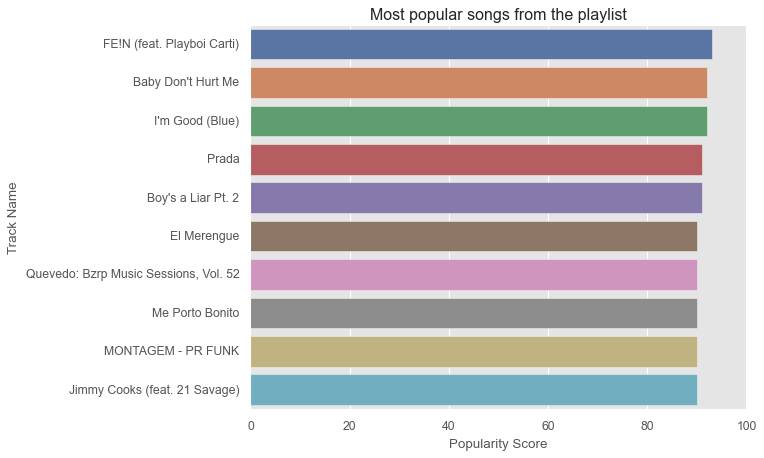

In [159]:
# Get top 10 most popular songs from the playlist
data = music_df.sort_values('Popularity', ascending=False)[:10]
sns.barplot(data=data, x='Popularity', y='Track Name', palette='deep')
plt.xlabel("Popularity Score")
plt.ylabel("Track Name")
plt.title("Most popular songs from the playlist")
plt.show()

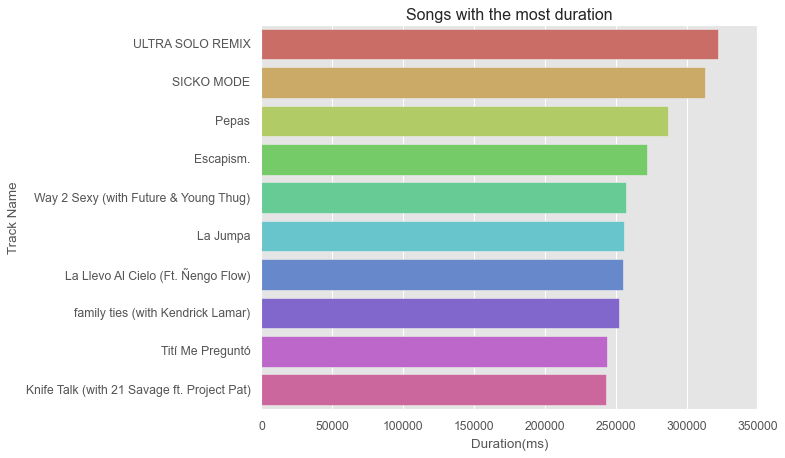

In [161]:
# Get top 10 songs with the most duration
data = music_df.sort_values('Duration(ms)', ascending=False)[:10]
sns.barplot(data=data, x='Duration(ms)', y='Track Name', palette='hls')
plt.xlabel("Duration(ms)")
plt.ylabel("Track Name")
plt.title("Songs with the most duration")
plt.show()

As this project's aim is to build a recommendation system, I will not dive deep into the EDA part. Similar analysis can be done for other features as well. 

## Build Recommendation System
In this section I will be demonstrating how to build a recommendation system.

In [163]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

While providing music recommendations to users, it is important to recommend the latest releases. For this, we need to give more weight to the latest releases in the recommendations. This can be done by making a custom metric known as the weighted popularity score which will give more weightage to the newly released tracks compared to the older ones.